In [ ]:
MACHINE LEARNING PROJECT- TEXAS HDMA LOANS

Alice Karanja



The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose loan information about mortgages. HMDA was originally enacted by Congress in 1975.
These public data are important because:
1. They help show whether lenders are serving the housing needs of their communities
2. They give public officials information that helps them make decisions and policies.
3. They shed light on lending patterns that could be discriminatory.

Data from https://www.consumerfinance.gov/data-research/hmda/explore
Used Texas 2017 dataset.
What kind of information you can find in the public HMDA data:
1. Information about the loan itself 
             - whether the application was approved or denied, 
             - loan amount, 
             - The type of loan, (whether it is a “VA” or “FHA” loan).
             -  If the loan is for buying a home, refinancing an existing mortgage, or
                 for home improvements.
2. Demographic information on applicants’ race, ethnicity, and sex which helps prevent discriminatory lending. 
3. Data about the lender like the name of the lender and which agency regulates them.
4. Information about the property itself like  the type of property and whether the owner intends to live there.

It’s important to note that the data do not include direct identifying information, like names or Social Security numbers.
Instead of disclosing the address, lenders disclose the census tract, which is the part of a community where the property is located. Census tracts vary in size, but on average about 4,000 people live in a census tract. This provides enough information about the location to be useful, but still provides protections for individual privacy.



Ran a random forest classifier model to predict if loans were approved or not.
Data set has 1,048,575 rows and 47 columns. I ended up dropping a lot of the categorical variables and only left a few that describe the loan applicant’s ethnicity and gender. 
This will help me in calculating some summaries about the loan approval rate.


In [7]:
#Import packages
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import seaborn as sns

In [3]:
#load the data set
Loans_Tx = pd.read_csv('C:/Users/me/Desktop/Datasets/Texas_hmda_2017.csv')

C:\Users\me\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,24,25,28,29,30,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Loans_Tx.head(1)

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,129.330002,NaN,38137.0,77.769997,9771.0,11372.0,240.0,72500.0,119.0,Texas,...,Female,NaN,NaN,NaN,NaN,Asian,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated


In [5]:
Loans_Tx.describe()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,sequence_number,edit_status_name,census_tract_number,as_of_year,application_date_indicator
count,1.035930e+06,59170.000000,1.035930e+06,1.035930e+06,1.035930e+06,1.035930e+06,1.048436e+06,1.035930e+06,933346.000000,0.0,0.0,1.035930e+06,1048575.0,0.0
mean,1.226341e+02,2.621321,7.529382e+03,4.683447e+01,1.845033e+03,2.417320e+03,2.200350e+02,6.843030e+04,126.332191,NaN,NaN,2.287504e+03,2017.0,NaN
std,4.722763e+01,1.522016,5.498940e+03,2.506064e+01,1.438919e+03,1.634768e+03,1.158206e+03,9.625286e+03,1288.122206,NaN,NaN,3.012324e+03,0.0,NaN
min,0.000000e+00,1.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.790000e+04,1.000000,NaN,NaN,1.000000e+00,2017.0,NaN
25%,8.946000e+01,1.680000,4.503000e+03,2.647000e+01,1.033000e+03,1.484000e+03,1.020000e+02,6.430000e+04,55.000000,NaN,NaN,1.520600e+02,2017.0,NaN
50%,1.162300e+02,1.970000,6.264000e+03,4.242000e+01,1.534000e+03,2.073000e+03,1.690000e+02,7.250000e+04,85.000000,NaN,NaN,6.070300e+02,2017.0,NaN
75%,1.479200e+02,2.690000,8.661000e+03,6.637000e+01,2.190000e+03,2.855000e+03,2.520000e+02,7.340000e+04,130.000000,NaN,NaN,3.502000e+03,2017.0,NaN
max,3.603700e+02,13.460000,5.381200e+04,1.000000e+02,1.397500e+04,1.538600e+04,7.000000e+05,9.160000e+04,270000.000000,NaN,NaN,9.801000e+03,2017.0,NaN


In [6]:
Loans_Tx.shape

(1048575, 47)

In [7]:
# Missing values
Loans_Tx.isnull().sum()

tract_to_msamd_income               12645
rate_spread                        989405
population                          12645
minority_population                 12645
number_of_owner_occupied_units      12645
number_of_1_to_4_family_units       12645
loan_amount_000s                      139
hud_median_family_income            12645
applicant_income_000s              115229
state_name                              0
state_abbr                              0
sequence_number                   1048575
respondent_id                           0
purchaser_type_name                     0
property_type_name                      0
preapproval_name                        0
owner_occupancy_name                    0
msamd_name                          87013
loan_type_name                          0
loan_purpose_name                       0
lien_status_name                        0
hoepa_status_name                       0
edit_status_name                  1048575
denial_reason_name_3              

In [8]:
# drop most of the categorical variable.
to_drop = ['rate_spread',
            'state_name',
            'state_abbr',
            'agency_name',
            'co_applicant_race_name_5',
            'co_applicant_race_name_4',
            'co_applicant_race_name_3',
            'co_applicant_race_name_2',
            'co_applicant_race_name_1',
            'applicant_race_name_5',
            'applicant_race_name_4',
            'applicant_race_name_3',
            'applicant_race_name_2',
            'applicant_race_name_1',
            'edit_status_name',
            'denial_reason_name_3',
            'denial_reason_name_2',
            'denial_reason_name_1',
            'application_date_indicator',
            'sequence_number',
            'application_date_indicator',
            'as_of_year',
            'agency_abbr',
            'population',
            'purchaser_type_name',
            'lien_status_name',
            'respondent_id',
            'census_tract_number',
            'owner_occupancy_name',
            'county_name',
            'msamd_name',
            'preapproval_name',
            'owner_occupancy_name']
 
Loans_Tx.drop(to_drop, inplace=True, axis=1)

In [9]:
Loans_Tx.shape

(1048575, 16)

In [10]:
Loans_Tx.head()


,tract_to_msamd_income,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_status_name,co_applicant_sex_name,co_applicant_ethnicity_name,applicant_sex_name,applicant_ethnicity_name,action_taken_name
0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Female,Not Hispanic or Latino,Loan originated
1,49.389999,43.930000,473.0,914.0,277.0,73400.0,NaN,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,No co-applicant,No co-applicant,Not applicable,Not applicable,Loan originated
2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,Not Hispanic or Latino,Male,Not Hispanic or Latino,Loan originated
3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated
4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Female,Hispanic or Latino,Loan originated


In [11]:
#change columns names:
Loans_Tx.rename(columns={'action_taken_name' : 'mrtg_approved',
                      'hoepa_status_name' : 'hoepa_loan',
                      'application_date_indicator' :'app_before_2014',
                      'co_applicant_sex_name': 'co_applicant_sex',
                      'respondent_id' : 'bank_ID',
                      'msamd_name': 'property_Loc',
                      'preapproval_name': 'preapproval_status',
                      'tract_to_msamd_income' : 'tract_msamd_income_ratio',
                      'population': 'tract_population',
                      'number_of_owner_occupied_units': 'owner_occupied_units_tract',
                      'number_of_1_to_4_family_units' : '1_4_fam_units_tract',
                      'hud_median_family_income' : 'median_income_msamd',
                      'minority_population' : 'percent_minority_pop_tract',
                      'applicant_sex_name': 'applicant_sex',
                      'applicant_ethnicity_name' : 'applicant_ethnicity',
                      'co_applicant_ethnicity_name' : 'co_applicant_ethnicity'}, inplace=True)

In [12]:
Loans_Tx.head()

,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_sex,co_applicant_ethnicity,applicant_sex,applicant_ethnicity,mrtg_approved
0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Female,Not Hispanic or Latino,Loan originated
1,49.389999,43.930000,473.0,914.0,277.0,73400.0,NaN,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,No co-applicant,No co-applicant,Not applicable,Not applicable,Loan originated
2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,Not Hispanic or Latino,Male,Not Hispanic or Latino,Loan originated
3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated
4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Female,Hispanic or Latino,Loan originated


In [13]:
#checking for duplicates: 
Loans_Tx.duplicated().sum()

10751

In [14]:
#drop duplicates if needed later
Loans_Tx.drop_duplicates()

,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_sex,co_applicant_ethnicity,applicant_sex,applicant_ethnicity,mrtg_approved
0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Female,Not Hispanic or Latino,Loan originated
1,49.389999,43.930000,473.0,914.0,277.0,73400.0,NaN,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,No co-applicant,No co-applicant,Not applicable,Not applicable,Loan originated
2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,Not Hispanic or Latino,Male,Not Hispanic or Latino,Loan originated
3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated
4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Female,Hispanic or Latino,Loan originated
5,87.879997,82.980003,1483.0,1932.0,105.0,72500.0,105.0,One-to-four family dwelling (other than manufa...,Conventional,Home improvement,Not a HOEPA loan,Female,Hispanic or Latino,Male,Hispanic or Latino,Loan originated
6,129.330002,77.769997,9771.0,11372.0,242.0,72500.0,84.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Male,Not Hispanic or Latino,Loan originated
7,49.389999,43.930000,473.0,914.0,232.0,73400.0,103.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,Female,Not Hispanic or Latino,Male,Not Hispanic or Latino,Loan originated
8,168.710007,9.500000,1273.0,1371.0,150.0,73400.0,165.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,No co-applicant,No co-applicant,Male,Not Hispanic or Latino,Loan originated
9,109.099999,71.620003,1213.0,1494.0,117.0,73400.0,61.0,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,No co-applicant,No co-applicant,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated


In [15]:
Loans_Tx.shape

(1048575, 16)

In [16]:
# Missing values
Loans_Tx.isnull().sum()

tract_msamd_income_ratio       12645
percent_minority_pop_tract     12645
owner_occupied_units_tract     12645
1_4_fam_units_tract            12645
loan_amount_000s                 139
median_income_msamd            12645
applicant_income_000s         115229
property_type_name                 0
loan_type_name                     0
loan_purpose_name                  0
hoepa_loan                         0
co_applicant_sex                   0
co_applicant_ethnicity             0
applicant_sex                      0
applicant_ethnicity                0
mrtg_approved                      0
dtype: int64

In [17]:
Loans_Tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
tract_msamd_income_ratio      1035930 non-null float64
percent_minority_pop_tract    1035930 non-null float64
owner_occupied_units_tract    1035930 non-null float64
1_4_fam_units_tract           1035930 non-null float64
loan_amount_000s              1048436 non-null float64
median_income_msamd           1035930 non-null float64
applicant_income_000s         933346 non-null float64
property_type_name            1048575 non-null object
loan_type_name                1048575 non-null object
loan_purpose_name             1048575 non-null object
hoepa_loan                    1048575 non-null object
co_applicant_sex              1048575 non-null object
co_applicant_ethnicity        1048575 non-null object
applicant_sex                 1048575 non-null object
applicant_ethnicity           1048575 non-null object
mrtg_approved                 1048575 non-null object
dtypes: float64(7

In [18]:
# what are the possible categories in mrtg_approved (target) column.
#print (Loans_Tx['mrtg_approved'].unique())

In [19]:
Loans_Tx.shape

(1048575, 16)

In [20]:
#count per level for target variable
#print (Loans_Tx['mrtg_approved'].unique())
print (dict(Counter(Loans_Tx.mrtg_approved)))


{'Loan originated': 559492, 'Application approved but not accepted': 35375, 'Application denied by financial institution': 166832, 'Application withdrawn by applicant': 140937, 'File closed for incompleteness': 49495, 'Loan purchased by the institution': 96444}


This dataset has 6 possible options for the target value.
Need to compress them into just 2 options.

Next look at the other categorical variables and what the values/ options are.

In [21]:
#count per level per categorical variable

print (dict(Counter(Loans_Tx.property_type_name)))
print (dict(Counter(Loans_Tx.loan_type_name)))
print (dict(Counter(Loans_Tx.loan_purpose_name)))
print (dict(Counter(Loans_Tx.hoepa_loan)))
print (dict(Counter(Loans_Tx.co_applicant_sex)))
print (dict(Counter(Loans_Tx.co_applicant_ethnicity)))
print (dict(Counter(Loans_Tx.applicant_sex)))
print (dict(Counter(Loans_Tx.applicant_ethnicity)))


{'One-to-four family dwelling (other than manufactured housing)': 979619, 'Manufactured housing': 66625, 'Multifamily dwelling': 2331}
{'Conventional': 757296, 'VA-guaranteed': 96288, 'FHA-insured': 186911, 'FSA/RHS-guaranteed': 8080}
{'Home purchase': 641183, 'Refinancing': 332543, 'Home improvement': 74849}
{'Not a HOEPA loan': 1048320, 'HOEPA loan': 255}
{'No co-applicant': 564068, 'Female': 305640, 'Information not provided by applicant in mail, Internet, or telephone application': 39589, 'Male': 87731, 'Not applicable': 51547}
{'No co-applicant': 564068, 'Not Hispanic or Latino': 283921, 'Information not provided by applicant in mail, Internet, or telephone application': 62133, 'Hispanic or Latino': 86519, 'Not applicable': 51934}
{'Female': 272535, 'Not applicable': 67116, 'Male': 627446, 'Information not provided by applicant in mail, Internet, or telephone application': 81478}
{'Not Hispanic or Latino': 633699, 'Not applicable': 67887, 'Information not provided by applicant in 

In [22]:
#how many unique values per categorical variable?
Loans_Tx[['property_type_name','loan_type_name','loan_purpose_name','hoepa_loan','co_applicant_sex','co_applicant_ethnicity','applicant_sex','applicant_ethnicity']].describe().transpose()

,count,unique,top,freq
property_type_name,1048575,3,One-to-four family dwelling (other than manufa...,979619
loan_type_name,1048575,4,Conventional,757296
loan_purpose_name,1048575,3,Home purchase,641183
hoepa_loan,1048575,2,Not a HOEPA loan,1048320
co_applicant_sex,1048575,5,No co-applicant,564068
co_applicant_ethnicity,1048575,5,No co-applicant,564068
applicant_sex,1048575,4,Male,627446
applicant_ethnicity,1048575,4,Not Hispanic or Latino,633699


# create new columns and re-code them.

In [23]:
# co_applicant sex instead of co_applicant gender column

#'No co-applicant': 564068, 'Female': 305640, 'Information not provided by applicant in mail, Internet, 
# or telephone application': 39589, 'Male': 87731, 'Not applicable': 51547}

row_indexes=Loans_Tx[Loans_Tx['co_applicant_sex']== 'Information not provided by applicant in mail, Internet, or telephone application'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_sex']== 'No co-applicant'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_sex']== 'Not applicable'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_sex']== 'Female'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_sex']== 'Male'].index

# co-applicant sex
Loans_Tx.loc[Loans_Tx['co_applicant_sex'] == 'Information not provided by applicant in mail, Internet, or telephone application', 'co_applicant_gender'] = 'other'
Loans_Tx.loc[Loans_Tx['co_applicant_sex'] == 'No co-applicant', 'co_applicant_gender'] = 'other'
Loans_Tx.loc[Loans_Tx['co_applicant_sex'] == 'Not applicable', 'co_applicant_gender'] = 'other'
Loans_Tx.loc[Loans_Tx['co_applicant_sex'] == 'Male', 'co_applicant_gender'] = 'Male'
Loans_Tx.loc[Loans_Tx['co_applicant_sex'] == 'Female', 'co_applicant_gender'] = 'Female'


In [24]:
#co_applicant ethn inplace of co_applicant ethnicity

#No co-applicant': 564068, 'Not Hispanic or Latino': 283921, 'Information not provided by applicant in mail, Internet,
#or telephone application': 62133, 'Hispanic or Latino': 86519, 'Not applicable': 51934}

row_indexes=Loans_Tx[Loans_Tx['co_applicant_ethnicity']== 'Information not provided by applicant in mail, Internet, or telephone application'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_ethnicity']== 'No co-applicant'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_ethnicity']== 'Not applicable'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_ethnicity']== 'Not Hispanic or Latino'].index
row_indexes=Loans_Tx[Loans_Tx['co_applicant_ethnicity']== 'Hispanic or Latino'].index

Loans_Tx.loc[Loans_Tx['co_applicant_ethnicity'] == 'Information not provided by applicant in mail, Internet, or telephone application', 'co_applicant_ethn'] = 'other'
Loans_Tx.loc[Loans_Tx['co_applicant_ethnicity'] == 'No co-applicant', 'co_applicant_ethn'] = 'other'
Loans_Tx.loc[Loans_Tx['co_applicant_ethnicity'] == 'Not applicable', 'co_applicant_ethn'] = 'other'
Loans_Tx.loc[Loans_Tx['co_applicant_ethnicity'] == 'Not Hispanic or Latino', 'co_applicant_ethn'] = 'non_Hispanic'
Loans_Tx.loc[Loans_Tx['co_applicant_ethnicity'] == 'Hispanic or Latino', 'co_applicant_ethn'] = 'Hispanic'


In [25]:
# Applicant sex inplace of applicant gender

# 'Female': 272535, 'Not applicable': 67116, 'Male': 627446, 'Information not provided by applicant in mail, Internet, 
# or telephone application': 81478}

row_indexes=Loans_Tx[Loans_Tx['applicant_sex']== 'Information not provided by applicant in mail, Internet, or telephone application'].index
row_indexes=Loans_Tx[Loans_Tx['applicant_sex']== 'Not applicable'].index
row_indexes=Loans_Tx[Loans_Tx['applicant_sex']== 'Female'].index
row_indexes=Loans_Tx[Loans_Tx['applicant_sex']== 'Male'].index

Loans_Tx.loc[Loans_Tx['applicant_sex'] == 'Information not provided by applicant in mail, Internet, or telephone application', 'applicant_gender'] = 'other'
Loans_Tx.loc[Loans_Tx['applicant_sex'] == 'Not applicable', 'applicant_gender'] = 'other'
Loans_Tx.loc[Loans_Tx['applicant_sex'] == 'Male', 'applicant_gender'] = 'Male'
Loans_Tx.loc[Loans_Tx['applicant_sex'] == 'Female', 'applicant_gender'] = 'Female'


In [26]:
# Applicant ethn inplace of applicant ethnicity
# 'Not Hispanic or Latino': 633699, 'Not applicable': 67887, 'Information not provided by applicant in mail, Internet,
# or telephone application': 126870, 'Hispanic or Latino': 220119}
row_indexes=Loans_Tx[Loans_Tx['applicant_ethnicity']== 'Information not provided by applicant in mail, Internet, or telephone application'].index
row_indexes=Loans_Tx[Loans_Tx['applicant_ethnicity']== 'Not applicable'].index
row_indexes=Loans_Tx[Loans_Tx['applicant_ethnicity']== 'Not Hispanic or Latino'].index
row_indexes=Loans_Tx[Loans_Tx['applicant_ethnicity']== 'Hispanic or Latino'].index

Loans_Tx.loc[Loans_Tx['applicant_ethnicity'] == 'Information not provided by applicant in mail, Internet, or telephone application', 'applicant_ethn'] = 'other'
Loans_Tx.loc[Loans_Tx['applicant_ethnicity'] == 'Not applicable', 'applicant_ethn'] = 'other'
Loans_Tx.loc[Loans_Tx['applicant_ethnicity'] == 'Not Hispanic or Latino', 'applicant_ethn'] = 'non_Hispanic'
Loans_Tx.loc[Loans_Tx['applicant_ethnicity'] == 'Hispanic or Latino', 'applicant_ethn'] = 'Hispanic'


In [27]:
# Loan approved --inplace of loan originated

# {'Loan originated': 559492, 'Application approved but not accepted': 35375, 'Application denied by financial institution':
# 166832,'Application withdrawn by applicant': 140937, 'File closed for incompleteness': 49495, 
#'Loan purchased by the institution':# 96444}

row_indexes=Loans_Tx[Loans_Tx['mrtg_approved']== 'Loan originated'].index
row_indexes=Loans_Tx[Loans_Tx['mrtg_approved']== 'Application approved but not accepted'].index
Loans_Tx.loc[row_indexes,'Loan_approved']="1"

row_indexes=Loans_Tx[Loans_Tx['mrtg_approved']== 'Application denied by financial institution'].index
row_indexes=Loans_Tx[Loans_Tx['mrtg_approved']== 'Application withdrawn by applicant'].index
row_indexes=Loans_Tx[Loans_Tx['mrtg_approved']== 'File closed for incompleteness'].index
row_indexes=Loans_Tx[Loans_Tx['mrtg_approved']== 'Loan purchased by the institution'].index
Loans_Tx.loc[row_indexes,'Loan_approved']="0"

#prepare target column 
Loans_Tx.loc[Loans_Tx['mrtg_approved'] == 'Loan originated', 'Loan_approved'] = 1
Loans_Tx.loc[Loans_Tx['mrtg_approved'] == 'Application approved but not accepted', 'Loan_approved'] = 1
Loans_Tx.loc[Loans_Tx['mrtg_approved'] == 'Application denied by financial institution', 'Loan_approved'] = 0
Loans_Tx.loc[Loans_Tx['mrtg_approved'] == 'Application withdrawn by applicant', 'Loan_approved'] = 0
Loans_Tx.loc[Loans_Tx['mrtg_approved'] == 'File closed for incompleteness', 'Loan_approved'] = 0
Loans_Tx.loc[Loans_Tx['mrtg_approved'] == 'Loan purchased by the institution', 'Loan_approved'] = 0



In [28]:
# drop the original column names and keep the new ones.
to_drop = ['mrtg_approved',
            'co_applicant_sex',
            'co_applicant_ethnicity',
            'applicant_sex',
            'applicant_ethnicity']

Loans_Tx.drop(to_drop, inplace=True, axis=1)

In [29]:
Loans_Tx.head()

,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_gender,co_applicant_ethn,applicant_gender,applicant_ethn,Loan_approved
0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,Female,non_Hispanic,1
1,49.389999,43.930000,473.0,914.0,277.0,73400.0,NaN,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,other,other,other,other,1
2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,non_Hispanic,Male,non_Hispanic,1
3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,other,other,1
4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,other,other,Female,Hispanic,1


In [30]:
#rearrange the columns so target column is at the end.
Loans_Tx =Loans_Tx[['tract_msamd_income_ratio', 'percent_minority_pop_tract', 'owner_occupied_units_tract', '1_4_fam_units_tract', 
                    'loan_amount_000s', 'median_income_msamd', 'applicant_income_000s', 'property_type_name', 'loan_type_name',
                    'loan_purpose_name', 'hoepa_loan', 'co_applicant_gender', 'co_applicant_ethn', 
                    'applicant_gender','applicant_ethn', 'Loan_approved']]


In [31]:
Loans_Tx.head()

,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_gender,co_applicant_ethn,applicant_gender,applicant_ethn,Loan_approved
0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,Female,non_Hispanic,1
1,49.389999,43.930000,473.0,914.0,277.0,73400.0,NaN,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,other,other,other,other,1
2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,non_Hispanic,Male,non_Hispanic,1
3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,other,other,1
4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,other,other,Female,Hispanic,1


In [32]:
#save clean data set to csv.
#Loans_Tx.to_csv('C:/Users/me/Desktop/Datasets/Loans_Tx.csv')
Loans_Tx = pd.read_csv('C:/Users/me/Desktop/Datasets/Loans_Tx.csv')

In [33]:
Loans_Tx.head()

,Unnamed: 0,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_gender,co_applicant_ethn,applicant_gender,applicant_ethn,Loan_approved
0,0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,Female,non_Hispanic,1
1,1,49.389999,43.930000,473.0,914.0,277.0,73400.0,NaN,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,other,other,other,other,1
2,2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,non_Hispanic,Male,non_Hispanic,1
3,3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,other,other,1
4,4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,other,other,Female,Hispanic,1


In [34]:
Loans_Tx.shape

(1048575, 17)

In [35]:
#check the ratio of approved / not approved
float(len(Loans_Tx[Loans_Tx.Loan_approved ==1]))/len(Loans_Tx)*100.0 


56.73099206065374

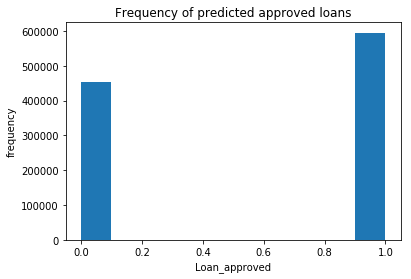

In [45]:
#histogram plot for frequency 
f,ax = plt.subplots()
data= Loans_Tx['Loan_approved']

plt.hist(data)
plt.xlabel('Loan_approved')
plt.ylabel('frequency')
plt.title("Frequency of predicted approved loans")
plt.show()

slightly imbalance data set

In [37]:
print (dict(Counter(Loans_Tx.property_type_name)))
print (dict(Counter(Loans_Tx.loan_type_name)))
print (dict(Counter(Loans_Tx.loan_purpose_name)))
print (dict(Counter(Loans_Tx.hoepa_loan)))
print (dict(Counter(Loans_Tx.co_applicant_gender)))
print (dict(Counter(Loans_Tx.co_applicant_ethn)))
print (dict(Counter(Loans_Tx.applicant_gender)))
print (dict(Counter(Loans_Tx.applicant_ethn)))

#co_applicant_gender	co_applicant_ethn	applicant_gender	applicant_ethn

{'One-to-four family dwelling (other than manufactured housing)': 979619, 'Manufactured housing': 66625, 'Multifamily dwelling': 2331}
{'Conventional': 757296, 'VA-guaranteed': 96288, 'FHA-insured': 186911, 'FSA/RHS-guaranteed': 8080}
{'Home purchase': 641183, 'Refinancing': 332543, 'Home improvement': 74849}
{'Not a HOEPA loan': 1048320, 'HOEPA loan': 255}
{'other': 655204, 'Female': 305640, 'Male': 87731}
{'other': 678135, 'non_Hispanic': 283921, 'Hispanic': 86519}
{'Female': 272535, 'other': 148594, 'Male': 627446}
{'non_Hispanic': 633699, 'other': 194757, 'Hispanic': 220119}


In [38]:
# what are the possible categories in 'values' in each categorical  column.
print (Loans_Tx['co_applicant_gender'].unique())
print (Loans_Tx['co_applicant_ethn'].unique())
print (Loans_Tx['applicant_gender'].unique())
print (Loans_Tx['applicant_ethn'].unique())

['other' 'Female' 'Male']
['other' 'non_Hispanic' 'Hispanic']
['Female' 'other' 'Male']
['non_Hispanic' 'other' 'Hispanic']


In [39]:
# check for variable correlation 
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
Loans_Tx.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Unnamed: 0,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,Loan_approved
Unnamed: 0,1.0,-0.044,0.035,0.0026,0.0099,-0.012,-0.017,-0.013,-0.86
tract_msamd_income_ratio,-0.044,1.0,-0.44,0.29,0.19,0.057,0.026,0.026,0.066
percent_minority_pop_tract,0.035,-0.44,1.0,-0.064,-0.037,-0.03,-0.18,-0.02,-0.067
owner_occupied_units_tract,0.0026,0.29,-0.064,1.0,0.98,-3.1e-05,0.11,0.0019,0.019
1_4_fam_units_tract,0.0099,0.19,-0.037,0.98,1.0,-0.0075,0.053,-0.00065,0.014
loan_amount_000s,-0.012,0.057,-0.03,-3.1e-05,-0.0075,1.0,0.036,0.28,0.016
median_income_msamd,-0.017,0.026,-0.18,0.11,0.053,0.036,1.0,0.025,0.02
applicant_income_000s,-0.013,0.026,-0.02,0.0019,-0.00065,0.28,0.025,1.0,0.015
Loan_approved,-0.86,0.066,-0.067,0.019,0.014,0.016,0.02,0.015,1.0


Owner occupied and 1-4 family units are highly correlated. 
Makes sense because if owner occupied, it means a nuclear family unit is living there as opposed to a commercial building.

# missing values

In [36]:
# get the number of missing data points per column
missing_values_count = Loans_Tx.isnull().sum()

# how many total missing values are there?
total_cells = np.product(Loans_Tx.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing_data = (total_missing/total_cells) * 100

print(percent_missing_data)


1.0018807036440212


About 1% missing values in entire dataset

In [40]:

# Missing values
Loans_Tx.isnull().sum()

Unnamed: 0                         0
tract_msamd_income_ratio       12645
percent_minority_pop_tract     12645
owner_occupied_units_tract     12645
1_4_fam_units_tract            12645
loan_amount_000s                 139
median_income_msamd            12645
applicant_income_000s         115229
property_type_name                 0
loan_type_name                     0
loan_purpose_name                  0
hoepa_loan                         0
co_applicant_gender                0
co_applicant_ethn                  0
applicant_gender                   0
applicant_ethn                     0
Loan_approved                      0
dtype: int64

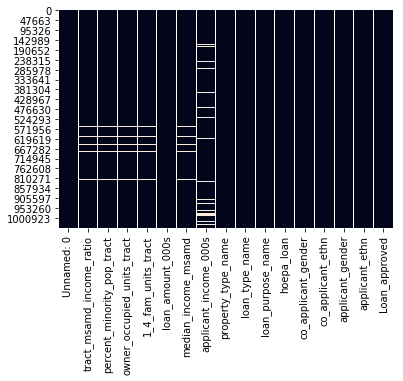

In [41]:
# heatmap
% matplotlib inline
import seaborn as sns
import missingno as msno
sns.heatmap(Loans_Tx.isnull(), cbar=False)

<BarContainer object of 17 artists>

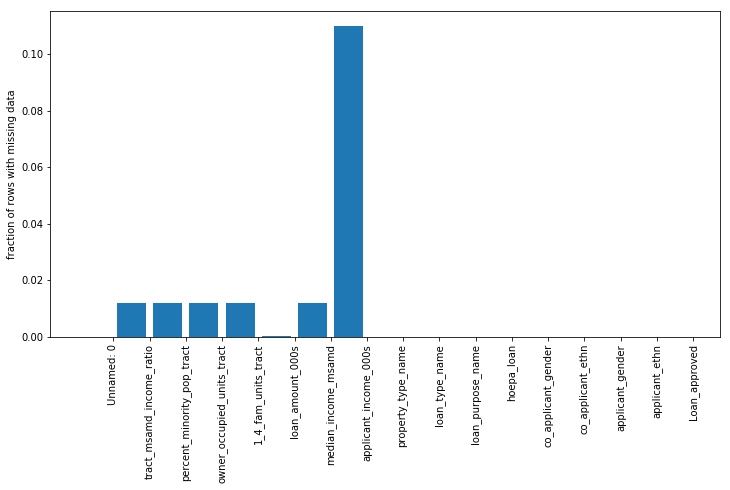

In [47]:
import matplotlib.pylab as plt
null_counts = Loans_Tx.isnull().sum()/len(Loans_Tx)
plt.figure(figsize=(12,6))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)


In [44]:
columns = Loans_Tx.columns
percent_missing = Loans_Tx.isnull().sum() * 100 / len(Loans_Tx)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(percent_missing)

Unnamed: 0                     0.000000
tract_msamd_income_ratio       1.205922
percent_minority_pop_tract     1.205922
owner_occupied_units_tract     1.205922
1_4_fam_units_tract            1.205922
loan_amount_000s               0.013256
median_income_msamd            1.205922
applicant_income_000s         10.989104
property_type_name             0.000000
loan_type_name                 0.000000
loan_purpose_name              0.000000
hoepa_loan                     0.000000
co_applicant_gender            0.000000
co_applicant_ethn              0.000000
applicant_gender               0.000000
applicant_ethn                 0.000000
Loan_approved                  0.000000
dtype: float64


The 'applicant_income_000s' column is missing almost 11%of its data values (10.989104)

# plot data of all variables
plt.figure(figsize=(20,8))
Loans_Tx.plot()

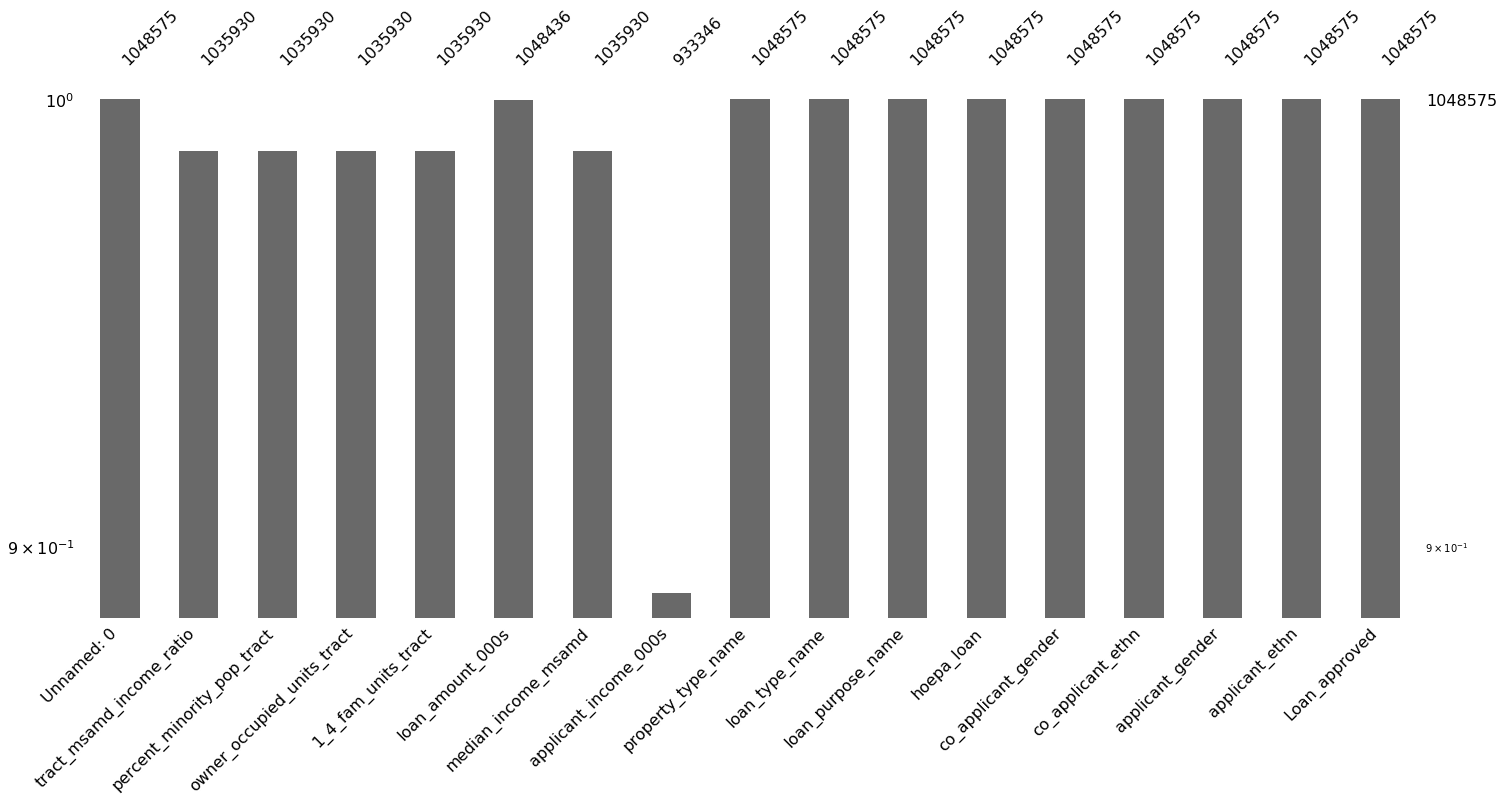

In [43]:
# msno.bar is a simple visualization of nullity by column:
msno.bar(Loans_Tx, log=True)

In [44]:
Loans_Tx.describe()

,Unnamed: 0,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,Loan_approved
count,1.048575e+06,1.035930e+06,1.035930e+06,1.035930e+06,1.035930e+06,1.048436e+06,1.035930e+06,933346.000000,1.048575e+06
mean,5.242870e+05,1.226341e+02,4.683447e+01,1.845033e+03,2.417320e+03,2.200350e+02,6.843030e+04,126.332191,5.673099e-01
std,3.026977e+05,4.722763e+01,2.506064e+01,1.438919e+03,1.634768e+03,1.158206e+03,9.625286e+03,1288.122206,4.954489e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.790000e+04,1.000000,0.000000e+00
25%,2.621435e+05,8.946000e+01,2.647000e+01,1.033000e+03,1.484000e+03,1.020000e+02,6.430000e+04,55.000000,0.000000e+00
50%,5.242870e+05,1.162300e+02,4.242000e+01,1.534000e+03,2.073000e+03,1.690000e+02,7.250000e+04,85.000000,1.000000e+00
75%,7.864305e+05,1.479200e+02,6.637000e+01,2.190000e+03,2.855000e+03,2.520000e+02,7.340000e+04,130.000000,1.000000e+00
max,1.048574e+06,3.603700e+02,1.000000e+02,1.397500e+04,1.538600e+04,7.000000e+05,9.160000e+04,270000.000000,1.000000e+00


# # look for data skewness or outlier before deciding on imputation

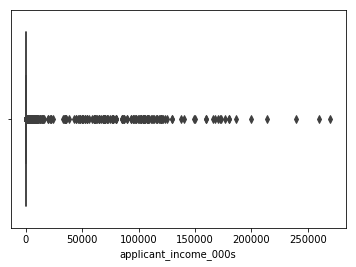

In [45]:

import seaborn as sns
sns.boxplot(x=Loans_Tx['applicant_income_000s'])

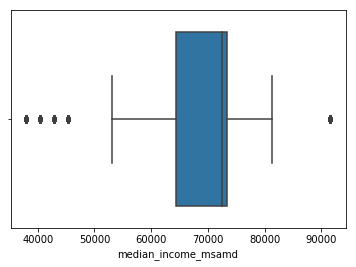

In [46]:
sns.boxplot(x=Loans_Tx['median_income_msamd'])



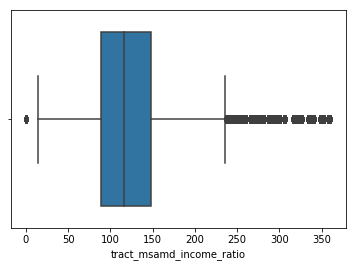

In [47]:
sns.boxplot(x=Loans_Tx['tract_msamd_income_ratio'])


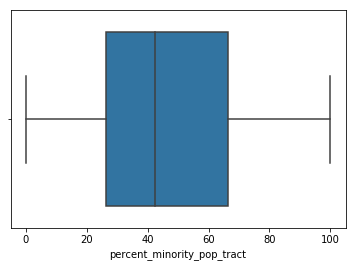

In [48]:
sns.boxplot(x=Loans_Tx['percent_minority_pop_tract'])


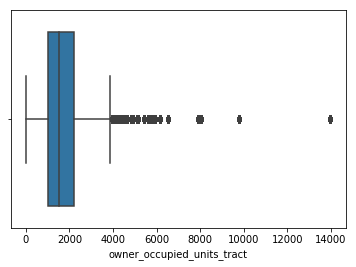

In [49]:
sns.boxplot(x=Loans_Tx['owner_occupied_units_tract'])


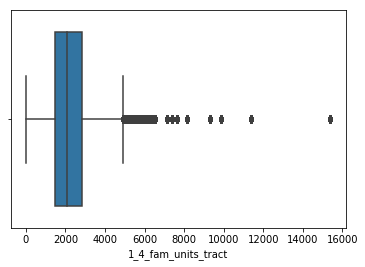

In [50]:
sns.boxplot(x=Loans_Tx['1_4_fam_units_tract'])

1. All the columns with missing data have outliers except the 'percent_minority_pop_tract' column.
2. 'applicant_income_000s' seems to have the most outliers and yet its missing the highest percentage of its data points.


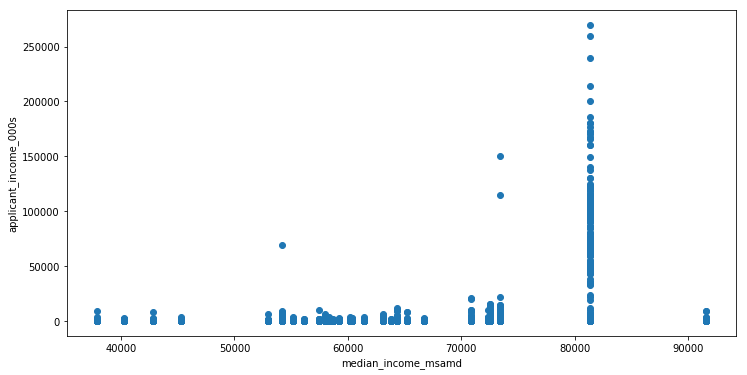

In [48]:
# outliers 
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(Loans_Tx['median_income_msamd'], Loans_Tx['applicant_income_000s'])
ax.set_xlabel('median_income_msamd')
ax.set_ylabel('applicant_income_000s')
plt.show()

## Data Imputation using the median of each column.

In [52]:
# impute NaNs with the median

Loans_Tx.fillna(Loans_Tx.median())
LoansTx = Loans_Tx.where(pd.notna(Loans_Tx), Loans_Tx.median(), axis='columns')

In [53]:
LoansTx.head()

,Unnamed: 0,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_gender,co_applicant_ethn,applicant_gender,applicant_ethn,Loan_approved
0,0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,Female,non_Hispanic,1
1,1,49.389999,43.930000,473.0,914.0,277.0,73400.0,85.0,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,other,other,other,other,1
2,2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,non_Hispanic,Male,non_Hispanic,1
3,3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,other,other,1
4,4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,other,other,Female,Hispanic,1


In [54]:
LoansTx.shape

(1048575, 17)

In [4]:
#save clean data set to csv.
#LoansTx.to_csv('C:/Users/me/Desktop/Datasets/LoansTx.csv')
LoansTx = pd.read_csv('C:/Users/me/Desktop/Datasets/LoansTx.csv')

In [75]:
# Any Missing values?
LoansTx.isnull().sum()

Unnamed: 0                    0
Unnamed: 0.1                  0
tract_msamd_income_ratio      0
percent_minority_pop_tract    0
owner_occupied_units_tract    0
1_4_fam_units_tract           0
loan_amount_000s              0
median_income_msamd           0
applicant_income_000s         0
property_type_name            0
loan_type_name                0
loan_purpose_name             0
hoepa_loan                    0
co_applicant_gender           0
co_applicant_ethn             0
applicant_gender              0
applicant_ethn                0
Loan_approved                 0
dtype: int64

Imputation was done successfully and we have no missing data in our dataset.

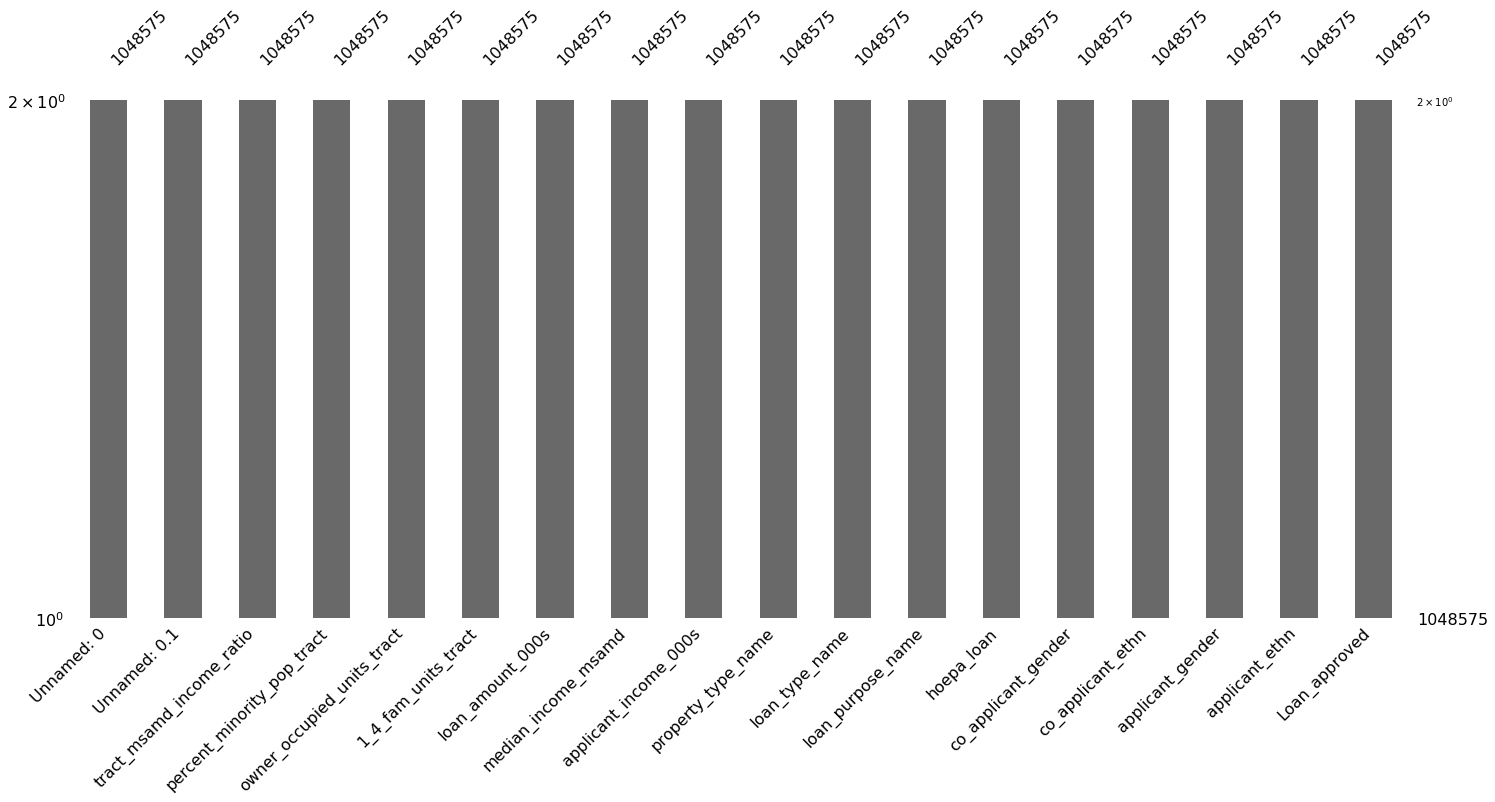

In [57]:
# msno.bar is a simple visualization of nullity by column:
msno.bar(LoansTx, log=True)

No missing data 

# One-hot encode categorical features

In [58]:
# rename the data set instead of overwriting it
LoansTx = pd.get_dummies(LoansTx)
LoansTx.head(5)

,Unnamed: 0,Unnamed: 0.1,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,Loan_approved,...,co_applicant_gender_other,co_applicant_ethn_Hispanic,co_applicant_ethn_non_Hispanic,co_applicant_ethn_other,applicant_gender_Female,applicant_gender_Male,applicant_gender_other,applicant_ethn_Hispanic,applicant_ethn_non_Hispanic,applicant_ethn_other
0,0,0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,1,...,1,0,0,1,1,0,0,0,1,0
1,1,1,49.389999,43.930000,473.0,914.0,277.0,73400.0,85.0,1,...,1,0,0,1,0,0,1,0,0,1
2,2,2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,1,...,0,0,1,0,0,1,0,0,1,0
3,3,3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,1,...,1,0,0,1,0,0,1,0,0,1
4,4,4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,1,...,1,0,0,1,1,0,0,1,0,0


In [98]:
#save clean data set to csv.
# rename the data set instead of overwriting it
#LoansTx.to_csv('C:/Users/me/Desktop/Datasets/LoansT.csv')
LoansT = pd.read_csv('C:/Users/me/Desktop/Datasets/LoansT.csv')

In [3]:
LoansT.head()

,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,Loan_approved,prop_type_Manufactured,prop_type__Multifamily,...,co_applicant_other,co_applicant_Hispanic,co_applicant_non_Hispanic,co_applicant_ethn_other,applicant_Female,applicant_Male,applicant_gender_other,applicant_Hispanic,applicant_non_Hispanic,applicant_ethn_other
0,129.330002,77.769997,9771,11372,240,72500,119,1,0,0,...,1,0,0,1,1,0,0,0,1,0
1,49.389999,43.930000,473,914,277,73400,85,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,88.320000,73.269997,433,736,399,73400,151,1,0,0,...,0,0,1,0,0,1,0,0,1,0
3,129.360001,45.130001,3794,4768,246,73400,122,1,0,0,...,1,0,0,1,0,0,1,0,0,1
4,121.830002,85.260002,2221,3441,107,45300,51,1,0,0,...,1,0,0,1,1,0,0,1,0,0


## Separate Features and Targets and Convert Data to Arrays

In [50]:

# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(LoansT['Loan_approved'])
# Remove the labels from the features
# axis 1 refers to the columns
LoansT= LoansT.drop('Loan_approved', axis = 1)
# Saving feature names for later use
LoansT_list = list(LoansT.columns)
# Convert to numpy array
LoansT = np.array(LoansT)

In [51]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_LoansT, test_LoansT, train_labels, test_labels =train_test_split(LoansT, labels, test_size = 0.25, random_state = 42)

In [52]:
print('Training Features Shape:', train_LoansT.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_LoansT.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (786431, 31)
Training Labels Shape: (786431,)
Testing Features Shape: (262144, 31)
Testing Labels Shape: (262144,)


## Train the model


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [54]:

def random_forest_classifier(features, labels):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, labels)
    return clf

In [55]:
def main():
    """
    Main function
    :return:
    """
 
    # Create random forest classifier instance
    trained_model = random_forest_classifier(train_LoansT , train_labels)
    print ("Trained model :: ", trained_model)
if __name__ == "__main__":
    main()

Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [57]:
## This line instantiates the model. 
rf = RandomForestClassifier() 

## Fit the model on your training data.
rf.fit(train_LoansT,train_labels) 

## And score it on your testing data.
rf.score(test_LoansT, test_labels)

0.5942115783691406

Testing accuracy is very poor.

## feature importance.

In [13]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(LoansT_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: loan_amount_000s     Importance: 0.22
Variable: applicant_income_000s Importance: 0.21
Variable: tract_msamd_income_ratio Importance: 0.1
Variable: percent_minority_pop_tract Importance: 0.1
Variable: owner_occupied_units_tract Importance: 0.1
Variable: 1_4_fam_units_tract  Importance: 0.1
Variable: median_income_msamd  Importance: 0.05
Variable: prop_type_Manufactured  Importance: 0.01
Variable: prop_type_One-to-four_family Importance: 0.01
Variable: loan_type_Conventional Importance: 0.01
Variable: loan_type_FHA-insured Importance: 0.01
Variable: purpose_Home purchase Importance: 0.01
Variable: purpose_Refi         Importance: 0.01
Variable: applicant_gender_other Importance: 0.01
Variable: applicant_non_Hispanic Importance: 0.01
Variable: applicant_ethn_other Importance: 0.01
Variable: prop_type__Multifamily Importance: 0.0
Variable: loan_type_FSA_guaranteed Importance: 0.0
Variable: loan_type_VA         Importance: 0.0
Variable: purpose_Home improv  Importance: 0.0
Variab

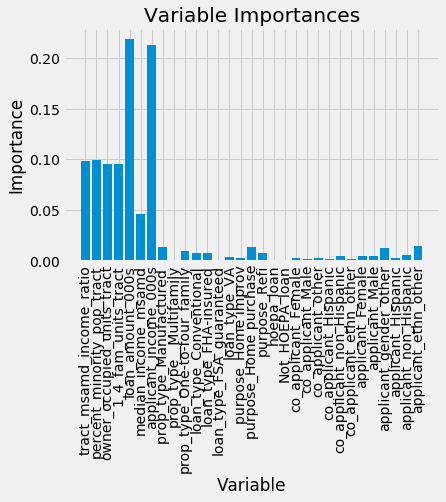

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, LoansT_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Top 2 important variables in our model are :
1. Loan amount 000s
2. Applicant income 000s


# Tuning the model

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Random forest crossvalidation

 5-fold cross- validation

In [62]:
# loading the package for cross validation score
from sklearn.model_selection import cross_val_score

In [30]:
# {'n_estimators': 40, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'entropy'}
modelRandom = RandomForestClassifier (n_estimators=40, min_samples_split= 9, max_depth= 15, criterion= 'entropy')# precision
modelRandom.fit(train_LoansT, train_labels)
CV_score = cross_val_score(modelRandom,train_LoansT, train_labels, cv=5)
print(CV_score)
print(CV_score.mean())

[0.66723251 0.66555405 0.66668362 0.66819679 0.66912293]
0.6673579801589049


In [31]:
# prediction on the test data 
modelRandom_pred = modelRandom.predict(test_LoansT)
# producing the confusion matrix 
confusion_matrix(test_labels, modelRandom_pred)

array([[ 49938,  63563],
       [ 23590, 125053]], dtype=int64)

### 10-fold cross validation; n_estimators = 40

In [63]:
# {'n_estimators': 40, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'entropy'}
modelRandom = RandomForestClassifier (n_estimators=40, min_samples_split= 9, max_depth= 15, criterion= 'entropy')# precision
modelRandom.fit(train_LoansT, train_labels)
CV_score = cross_val_score(modelRandom,train_LoansT, train_labels, cv=10)
print(CV_score)
print(CV_score.mean())

[0.66808657 0.66848075 0.66650984 0.66509842 0.66767544 0.66481441
 0.6676373  0.6682943  0.66954045 0.66989649]
0.6676033970673318


In [64]:
# prediction on the test data 
modelRandom_pred = modelRandom.predict(test_LoansT)
# producing the confusion matrix 
confusion_matrix(test_labels, modelRandom_pred)

array([[ 50134,  63367],
       [ 23862, 124781]], dtype=int64)

### 10-fold cross validation; n_estimators = 100

In [65]:
# {'n_estimators': 100, 'min_samples_split': 9, 'max_depth': 15, 'criterion': 'entropy'}
modelRandom = RandomForestClassifier (n_estimators=100, min_samples_split= 9, max_depth= 15, criterion= 'entropy')# precision
modelRandom.fit(train_LoansT, train_labels)
CV_score = cross_val_score(modelRandom,train_LoansT, train_labels, cv=10)
print(CV_score)
print(CV_score.mean())

[0.66855704 0.66818829 0.66633182 0.66596307 0.66765001 0.66607327
 0.66813321 0.66872663 0.66970576 0.66931156]
0.6678640676267712


In [66]:
# prediction on the test data 
modelRandom_pred = modelRandom.predict(test_LoansT)
# producing the confusion matrix 
confusion_matrix(test_labels, modelRandom_pred)

array([[ 50061,  63440],
       [ 23715, 124928]], dtype=int64)

## Logistic regression crossvalidation

In [34]:
# loading the package for logistic regression
from sklearn.linear_model import LogisticRegression
# setting the best parameters from the previous tuned parameters
logR_model = LogisticRegression(penalty= 'l1', class_weight= 'balanced', C= 1000.)
# fitting the model 
logR_model.fit(train_LoansT, train_labels)
# accuracy score of different folds 
CV_score = cross_val_score(logR_model, train_LoansT, train_labels, cv=5)
print(CV_score)
# mean of the accuracy scores
print(CV_score.mean())

[0.63972865 0.63885763 0.63986623 0.63985987 0.64078583]
0.639819643451491


In [35]:
# prediction on the test data 
logR_model_pred = logR_model.predict(test_LoansT)
# producing the confusion matrix 
confusion_matrix(test_labels, logR_model_pred)

array([[ 65596,  47905],
       [ 46735, 101908]], dtype=int64)

## Decision tree classifier

In [24]:
# loading the package for decision tree
from sklearn.tree import DecisionTreeClassifier 
# setting the best parameters from the previous tuned parameters
DTree_model = DecisionTreeClassifier(random_state= 123, min_samples_split= 4, min_samples_leaf= 6, max_features= 'sqrt')
# fitting the model 
DTree_model.fit(train_LoansT, train_labels)
# accuracy score of different folds 
CV_score = cross_val_score(DTree_model, train_LoansT, train_labels, cv=5)
print(CV_score)
# mean of the accuracy scores 
print(CV_score.mean())

[0.61659896 0.61649087 0.61614511 0.61529316 0.61734431]
0.6163744824771206


In [25]:
# prediction on the test data 
DTree_model_pred = DTree_model.predict(test_LoansT)
# producing the confusion matrix 
confusion_matrix(test_labels, DTree_model_pred)

array([[ 55587,  57914],
       [ 43216, 105427]], dtype=int64)

## Data summaries 

In [9]:
#Subset dataframe to create 2 new data frame that includes only those that are approved and those that are not.
not_Approved= LoansTx[LoansTx['Loan_approved']==0] #Loan_approved 0 = no
Approved= LoansTx[LoansTx['Loan_approved']==1] #Loan_approved 1 = yes
print (Approved.describe())
print (not_Approved.describe())

          Unnamed: 0   Unnamed: 0.1  tract_msamd_income_ratio  \
count  594867.000000  594867.000000             594867.000000   
mean   298258.072443  298258.072443                125.311808   
std    173170.156916  173170.156916                 47.780598   
min         0.000000       0.000000                  0.000000   
25%    148716.500000  148716.500000                 92.110001   
50%    297433.000000  297433.000000                118.620003   
75%    446149.500000  446149.500000                151.309998   
max    652185.000000  652185.000000                360.369995   

       percent_minority_pop_tract  owner_occupied_units_tract  \
count               594867.000000               594867.000000   
mean                    45.383700                 1868.204945   
std                     24.481840                 1444.427038   
min                      0.000000                    0.000000   
25%                     25.440001                 1048.000000   
50%                     

In [12]:
Approved.head(5)

,Unnamed: 0,Unnamed: 0.1,tract_msamd_income_ratio,percent_minority_pop_tract,owner_occupied_units_tract,1_4_fam_units_tract,loan_amount_000s,median_income_msamd,applicant_income_000s,property_type_name,loan_type_name,loan_purpose_name,hoepa_loan,co_applicant_gender,co_applicant_ethn,applicant_gender,applicant_ethn,Loan_approved
0,0,0,129.330002,77.769997,9771.0,11372.0,240.0,72500.0,119.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,Female,non_Hispanic,1
1,1,1,49.389999,43.930000,473.0,914.0,277.0,73400.0,85.0,One-to-four family dwelling (other than manufa...,Conventional,Refinancing,Not a HOEPA loan,other,other,other,other,1
2,2,2,88.320000,73.269997,433.0,736.0,399.0,73400.0,151.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,Female,non_Hispanic,Male,non_Hispanic,1
3,3,3,129.360001,45.130001,3794.0,4768.0,246.0,73400.0,122.0,One-to-four family dwelling (other than manufa...,Conventional,Home purchase,Not a HOEPA loan,other,other,other,other,1
4,4,4,121.830002,85.260002,2221.0,3441.0,107.0,45300.0,51.0,One-to-four family dwelling (other than manufa...,VA-guaranteed,Home purchase,Not a HOEPA loan,other,other,Female,Hispanic,1


Number of people who apply for loan :Approved vs not approved
1    594867
0    453708
Name: Loan_approved, dtype: int64


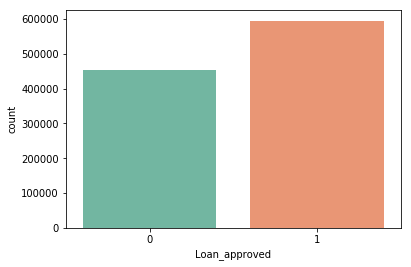

In [13]:
print("Number of people who apply for loan :Approved vs not approved")
print(LoansTx['Loan_approved'].value_counts())
sns.countplot(x='Loan_approved', data=LoansTx, palette = 'Set2')

Number of people who apply for loan group by ethnicity
non_Hispanic    633699
Hispanic        220119
other           194757
Name: applicant_ethn, dtype: int64


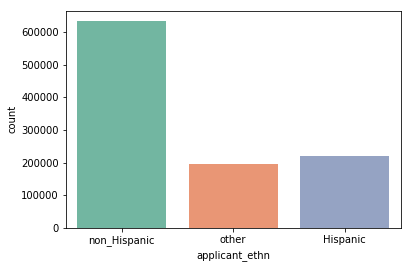

In [17]:
print("Number of people who apply for loan group by ethnicity")
print(LoansTx['applicant_ethn'].value_counts())

sns.countplot(x='applicant_ethn', data=LoansTx, palette = 'Set2')

Number of people whose loan was approved group by ethnicity
non_Hispanic    396937
Hispanic        121493
other            76437
Name: applicant_ethn, dtype: int64


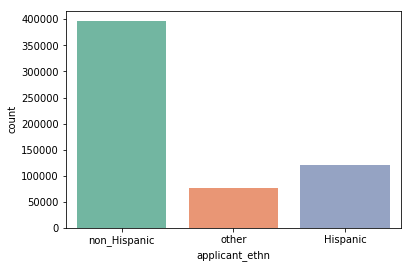

In [18]:
print("Number of people whose loan was approved group by ethnicity")
print(Approved['applicant_ethn'].value_counts())

sns.countplot(x='applicant_ethn', data=Approved, palette = 'Set2')

Number of people who apply for loan group by gender
Male      627446
Female    272535
other     148594
Name: applicant_gender, dtype: int64


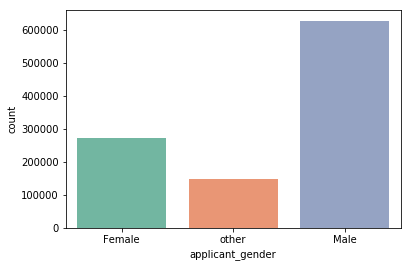

In [8]:
print("Number of people who apply for loan group by gender")
print(LoansTx['applicant_gender'].value_counts())

sns.countplot(x='applicant_gender', data=LoansTx, palette = 'Set2')

Number of people whose loans were approved by gender
Male      383330
Female    157473
other      54064
Name: applicant_gender, dtype: int64


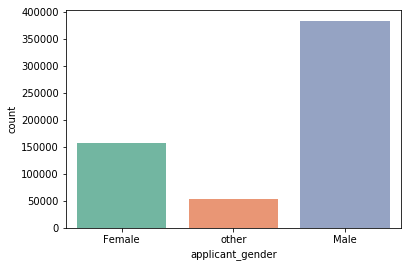

In [10]:
print("Number of people whose loans were approved by gender")
print(Approved['applicant_gender'].value_counts())

sns.countplot(x='applicant_gender', data= Approved, palette = 'Set2')

WHAT WENT WRONG?

My model performance was less than fulfilling and these are the possible reasons.
1. According to the variable importance calculation, ‘applicant income 000s’ is 1 of the top 2 important variables in our model.
It was missing about 11% of its data points. I imputed using the median instead of the mean to reduce bias due to the many 
outliers present in that column. Perhaps even that was not sufficient for imputation and maybe a more sophisticated method of 
imputation was necessary.
Poor data collection techniques- so many levels for each categorical variable. E.g. Target variable (loan_approved) had 6 
possible options/ levels which I compressed into just 2 i.e. approved (1)or not approved (0).

1. This data set was collected for purposes of city planning for housing needs in the community and to check for discrimination. 
Therefore the variables in the dataset are geared towards that. 
2. However, I was using it to predict whose loan will be approved and which will not. Perhaps, there are more important variable
that go into predicting loan approvals for the banks and other financial institutions.
3. Using the dataset for the wrong purpose- need credit history, other loans extended to applicant, education levels which could
help approximate the income. 



WHAT WE LEARN FROM THIS DATASET

We can evaluate the distribution of loan applications vs approval within the different demographic groups.
1. Most of the loan applications came from non-Hispanic applicants. Also, most of the approved loans are for non-Hispanic 
applicants.
2. Most of the loan applicants were males.
3. Most of the approved loans are for male applicants



In [ ]:
References:
1. https://www.kaggle.com/cgump3rt/investigate-missing-values
2. https://www.kaggle.com/chaseos/understanding-id-and-timestamp3.
3. https://github.com/ResidentMario/missingno
4. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
5. https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
6. https://www.kaggle.com/gpreda/credit-card-fraud-detection-with-rf-auc-0-93
7. http://dataaspirant.com/2017/06/26/random-forest-classifier-python-scikit-learn/
8. https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
9. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
